In [83]:
import numpy as np
import pandas as pd
import re
import ast

#import matplotlib.pyplot as plt

In [84]:
# Change the file path for the file movie.metadata.tsv
file_path = "data/movie.metadata.tsv"

In [85]:
# Reading the file into a pandas dataframe
movie_summaries = pd.read_csv(file_path, sep="\t", header=None)
movie_summaries.columns = ["Wikipedia movie ID",
 "Freebase_movie_ID",
 "Movie_name",
 "Movie_release_date",
 "Movie_box_office_revenue",
 "Movie_runtime",
 "Movie_languages",
 "Movie_countries",
 "Movie_genres"]
movie_summaries.head()

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [86]:
# Remove prefix '/m/'
movie_summaries['Freebase_movie_ID'] = movie_summaries['Freebase_movie_ID'].str.replace('/m/', '')

In [87]:
# Create new columns for languages, countries and genres
# The data type of the new columns is list containing all possible values
# Only take the values into account for now,
# If we need the code for further analysis, just apply x.keys() instead of x.values()

movie_summaries['Movie_languages_clean'] = movie_summaries['Movie_languages'].apply(ast.literal_eval).apply(lambda x: list(x.values()))
movie_summaries['Movie_countries_clean'] = movie_summaries['Movie_countries'].apply(ast.literal_eval).apply(lambda x: list(x.values()))
movie_summaries['Movie_genres_clean'] = movie_summaries['Movie_genres'].apply(ast.literal_eval).apply(lambda x: list(x.values()))

In [92]:
# Extract the release year
# This column only contains the years
movie_summaries['Movie_release_year'] = movie_summaries['Movie_release_date'].str.extract(r'(\d{4})')

# Convert strings to datetime values if there are
# For the rows with only years, the value is replaced by NaT
# pd.to_datetime has a bug if the format provided is more "precise" than what is in the dataframe, it has default values and will not 
# raise an error or replace with NaT
# specifically %Y-%m-%d with year 2000 defaults to 2000-01-01, even with the exact=True argument.

movie_summaries['Movie_release_date_datetime'] = movie_summaries['Movie_release_date'].astype('str').apply(
        lambda x: pd.to_datetime(x if "-" in x else pd.NaT, errors="coerce")
)

In [93]:
movie_summaries.head()

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_languages_clean,Movie_countries_clean,Movie_genres_clean,Movie_release_year,Movie_release_date_datetime
0,975900,03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,2001-08-24
1,3196793,08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000,2000-02-16
2,28463795,0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988,NaT
3,9363483,0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987,NaT
4,261236,01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama],1983,NaT


In [118]:
display(movie_summaries['Movie_release_year'].dropna().max())
display(movie_summaries['Movie_release_year'].dropna().min())
# Movie released in 1010??? Turkey was miles ahead of other countries wow
display(movie_summaries.sort_values(by='Movie_release_year').head())

'2016'

'1010'

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_languages_clean,Movie_countries_clean,Movie_genres_clean,Movie_release_year,Movie_release_date_datetime
62836,29666067,0fphzrf,Hunting Season,1010-12-02,12160978.0,140.00,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...","[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",1010,NaT
57963,1082508,044ggd,Roundhay Garden Scene,1888,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",[Silent film],[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",1888,NaT
38764,12170539,02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...","[Silent film, English Language]",[United Kingdom],"[Short Film, Silent film, Indie, Black-and-white]",1889,NaT
53907,6431996,0g53t3,"Monkeyshines, No. 1",1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",[Silent film],[United States of America],[Silent film],1890,NaT
60249,22770416,0gj9h_4,London's Trafalgar Square,1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",[Silent film],[United Kingdom],"[Short Film, Silent film]",1890,NaT


In [152]:
# explode() transforms lists of languages to rows, so that each rows contains 1 language
display(movie_summaries['Movie_languages_clean'].explode().unique())
# There is this as a language: '\ud801\udc16\ud801\udc32\ud801\udc49\ud801\udc4b\ud801\udc4c\ud801\udc32' ,unicode chars: 𐌖𐌲𐑉𐑋𐑌𐌲

contains = movie_summaries[movie_summaries['Movie_languages_clean'].apply(lambda x: 'Xhosa Language' in x)]
display(contains)

array(['English Language', 'Norwegian Language', 'German Language',
       'Silent film', 'Spanish Language', 'Japanese Language',
       'Turkish Language', nan, 'Russian Language', 'Italian Language',
       'Tamil Language', 'Hindi Language', 'Malayalam Language',
       'Standard Mandarin', 'Afrikaans Language', 'Cantonese',
       'Standard Cantonese', 'Swedish Language', 'Danish Language',
       'Portuguese Language', 'Dutch Language', 'Polish Language',
       'Korean Language', 'Hungary', 'Hungarian language',
       'Telugu language', 'French Language', 'Punjabi language',
       'Romani language', 'Serbo-Croatian', 'Bulgarian Language',
       'Serbian language', 'Arabic Language', 'Greek Language',
       'Nepali Language', 'Swahili Language', 'Finnish Language',
       'Tagalog language', 'Romanian Language', 'Bengali Language',
       'Czech Language', 'Slovak Language', 'Chinese language',
       'Kannada Language', 'Irish', 'Hebrew Language',
       'Filipino language',

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_languages_clean,Movie_countries_clean,Movie_genres_clean,Movie_release_year,Movie_release_date_datetime
1796,9244646,0281f6k,Cape of Good Hope,2004,NaN,107.0,"{""/m/0nl8g"": ""Xhosa Language"", ""/m/0x82"": ""Afr...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hj3n0w"": ""Ensemble Film"", ""/m/03q4nz"": ""...","[Xhosa Language, Afrikaans Language, English L...","[United States of America, South Africa]","[Ensemble Film, World cinema, Comedy-drama, Dr...",2004,NaT
8765,35013147,0j67f6q,Sea Point Days,2008-09-06,NaN,96.0,"{""/m/0nl8g"": ""Xhosa Language"", ""/m/0x82"": ""Afr...","{""/m/0hzlz"": ""South Africa""}","{""/m/0jtdp"": ""Documentary""}","[Xhosa Language, Afrikaans Language, English L...",[South Africa],[Documentary],2008,2008-09-06
11566,5073426,08frc4,U-Carmen e-Khayelitsha,2005-04-01,NaN,122.0,"{""/m/0nl8g"": ""Xhosa Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",...",[Xhosa Language],[South Africa],"[Musical, Drama, Romance Film, World cinema]",2005,2005-04-01
12115,16975721,04144dl,Endgame,2009-01-18,NaN,109.0,"{""/m/0nl8g"": ""Xhosa Language"", ""/m/0x82"": ""Afr...","{""/m/07ssc"": ""United Kingdom""}","{""/m/03g3w"": ""History"", ""/m/07s9rl0"": ""Drama"",...","[Xhosa Language, Afrikaans Language, English L...",[United Kingdom],"[History, Drama, Indie, Political drama]",2009,2009-01-18
12467,5028914,0c_kl6,3 Needles,2006-12-01,NaN,127.0,"{""/m/02h40lc"": ""English Language"", ""/m/03115z""...","{""/m/0hzlz"": ""South Africa"", ""/m/0d060g"": ""Can...","{""/m/07s9rl0"": ""Drama"", ""/m/06lbpz"": ""Social p...","[English Language, Mandarin Chinese, Xhosa Lan...","[South Africa, Canada, China]","[Drama, Social problem film, Indie, Chinese Mo...",2006,2006-12-01
21432,88678,0m63c,The Lion King,1994-06-15,951583777.0,87.0,"{""/m/0nl8g"": ""Xhosa Language"", ""/m/0gndv"": ""Zu...","{""/m/09c7w0"": ""United States of America""}","{""/m/04rlf"": ""Music"", ""/m/03k9fj"": ""Adventure""...","[Xhosa Language, Zulu Language, Swahili Langua...",[United States of America],"[Music, Adventure, Children's/Family, Animatio...",1994,1994-06-15
27554,32433488,0gyv1c_,The Creators Documentary,2012,NaN,76.0,"{""/m/0nl8g"": ""Xhosa Language"", ""/m/0x82"": ""Afr...","{""/m/0hzlz"": ""South Africa""}","{""/m/03g3w"": ""History"", ""/m/04t36"": ""Musical"",...","[Xhosa Language, Afrikaans Language, English L...",[South Africa],"[History, Musical, News, Documentary]",2012,NaT
28307,25805385,09v31h6,White Wedding,2009-04-29,NaN,93.0,"{""/m/0nl8g"": ""Xhosa Language"", ""/m/0x82"": ""Afr...","{""/m/0hzlz"": ""South Africa""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...","[Xhosa Language, Afrikaans Language, Zulu Lang...",[South Africa],"[Romantic comedy, Romance Film, Comedy, World ...",2009,2009-04-29
51706,32552492,0bvstpq,Winnie,2011-09-16,NaN,104.0,"{""/m/0nl8g"": ""Xhosa Language"", ""/m/0t_2"": ""Ame...","{""/m/0hzlz"": ""South Africa"", ""/m/0d060g"": ""Can...","{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Xhosa Language, American English]","[South Africa, Canada]","[Drama, World cinema]",2011,2011-09-16
52586,23823057,06_ww_q,Disgrace,2008-09-06,42122574.0,119.0,"{""/m/0nl8g"": ""Xhosa Language"", ""/m/0x82"": ""Afr...","{""/m/0hzlz"": ""South Africa"", ""/m/0chghy"": ""Aus...","{""/m/07s9rl0"": ""Drama""}","[Xhosa Language, Afrikaans Language, Zulu Lang...","[South Africa, Australia, New Zealand]",[Drama],2008,2008-09-06


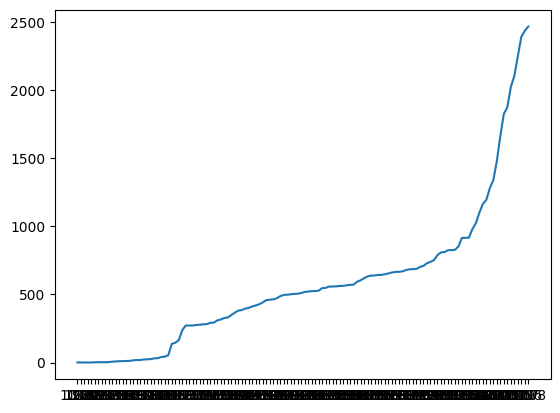

In [120]:
plt.plot(movie_summaries['Movie_release_year'].dropna().value_counts().sort_values(ascending=True))
